In [1]:
# Library Imports
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
#Import file
Mktcus6 = pd.read_csv("marketing_customer_analysis.csv")

In [27]:
# Data Cleaning
Mktcus6.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [28]:
# Standardizing headers - Removing spaces
Mktcus6.columns = Mktcus6.columns.str.replace(' ','')

In [29]:
Mktcus6.columns = Mktcus6.columns.str.lower()

In [30]:
# Header Check
Mktcus6.head()

,customer,state,customerlifetimevalue,response,coverage,education,effectivetodate,employmentstatus,gender,income,...,monthssincepolicyinception,numberofopencomplaints,numberofpolicies,policytype,policy,renewoffertype,saleschannel,totalclaimamount,vehicleclass,vehiclesize
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [35]:
# Dropping customer, state and effectivetodate columns from data
Mktcus6 = Mktcus6.drop(['customer','state','effectivetodate'], axis = True)

In [36]:
#  Create df with only categoricals
Mktcat = Mktcus6.select_dtypes('object')

In [37]:
# list of catgegorical columns
list(Mktcat)

['response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'locationcode',
 'maritalstatus',
 'policytype',
 'policy',
 'renewoffertype',
 'saleschannel',
 'vehicleclass',
 'vehiclesize']

In [38]:
# Copy df for testing
Mktcuscopy = Mktcus6.copy()

## Analysis
One Hot/ Label Encoding (categorical)

In [39]:
#import library
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown = 'error',drop = 'first').fit(Mktcat)

In [40]:
# Print encode categories
encoded = encoder.transform(Mktcat).toarray()
encoded
sel_cat = pd.get_dummies(Mktcat, drop_first = True)

print(sel_cat)

      response_Yes  coverage_Extended  coverage_Premium  education_College  \
0                0                  0                 0                  0   
1                0                  1                 0                  0   
2                0                  0                 1                  0   
3                0                  0                 0                  0   
4                0                  0                 0                  0   
...            ...                ...               ...                ...   
9129             0                  0                 0                  0   
9130             1                  1                 0                  1   
9131             0                  1                 0                  0   
9132             0                  1                 0                  1   
9133             0                  1                 0                  1   

      education_Doctor  education_High School or Below  educati

In [41]:
# Addition to testing database "Mktcuscopy"
Mktcus7 = pd.concat((sel_cat,Mktcuscopy), axis =1)

In [42]:
# Header Check
Mktcus7.head()

,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,...,monthssincepolicyinception,numberofopencomplaints,numberofpolicies,policytype,policy,renewoffertype,saleschannel,totalclaimamount,vehicleclass,vehiclesize
0,0,0,0,0,0,0,0,1,0,0,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,0,1,0,0,0,0,0,0,0,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,0,0,1,0,0,0,0,1,0,0,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,0,0,0,0,0,0,0,0,0,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,0,0,0,0,0,0,0,1,0,0,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [45]:
# Removing original categorical columns from Mktcus7 df and creation of new Mktcus8 df
Mktcus8 = Mktcus7.drop(['response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'locationcode',
 'maritalstatus',
 'policytype',
 'policy',
 'renewoffertype',
 'saleschannel',
 'vehicleclass',
 'vehiclesize'], axis = True)

## Linear Regression

In [46]:
# Train - Test Split (Making X and Y variables)
from sklearn.model_selection import train_test_split

Y = Mktcus8['totalclaimamount']

X = Mktcus8.drop(['totalclaimamount'], axis = True)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 100)

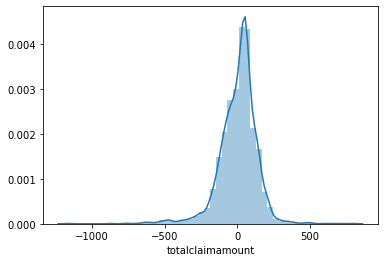

In [47]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression
import math
model = LinearRegression()

lm = model.fit(X_train, Y_train)

predictions = lm.predict(X_test)
residuals = predictions - Y_test

sns.distplot(residuals)

## Model Validation

In [50]:
# Import of libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [51]:
# Setting Metric formulas

R2 = r2_score (Y_test,predictions)
MSE = mean_squared_error (Y_test, predictions)
RMSE = sqrt(MSE)
MAE = mean_absolute_error (Y_test, predictions)


In [66]:
# Metric Results

print("R2 Score = {:5.3f}". format(R2))
print("MSE = {:5.3f}". format(MSE))
print("RMSE = {:5.3f}". format(RMSE))
print("MAE = {:5.3f}". format(MAE))

R2 Score = 0.777
MSE = 17776.892
RMSE = 133.330
MAE = 94.239
